**Dataset Description.**




The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



##**Importing Required Libraries**

In [13]:
#Importing Required Libraries

import tensorflow as tf 
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [14]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)  

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

##**Build the Encoder Model**



In [15]:
encoder = Model(input_img, encoded) #encoded

##**Build the Decoder Model**

In [16]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input)) #32 to 784

In [17]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001))
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [18]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

##**Normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784**



In [19]:
import numpy as np

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


##**Train the autoencoder for 50 epochs**

In [20]:
autoencoder.fit(x_train, x_train, #here we are usinf again x_train, because of no y_train
                epochs=50,
                batch_size=16,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
3750/3750 [==============================] - 23s 6ms/step - loss: 0.1399 - val_loss: 0.1004
Epoch 2/50
3750/3750 [==============================] - 21s 6ms/step - loss: 0.0979 - val_loss: 0.0947
Epoch 3/50
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0956 - val_loss: 0.0936
Epoch 4/50
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0949 - val_loss: 0.0935
Epoch 5/50
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0945 - val_loss: 0.0930
Epoch 6/50
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0943 - val_loss: 0.0927
Epoch 7/50
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0941 - val_loss: 0.0929
Epoch 8/50
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0940 - val_loss: 0.0927
Epoch 9/50
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0939 - val_loss: 0.0924
Epoch 10/50
3750/3750 [==============================] - 11s 3ms/step - l

##**Data Visualization**

In [21]:
# encode and decode some digits
# note that we take them from the test set

encoded_imgs = encoder.predict(x_test)  #784-32
decoded_imgs = decoder.predict(encoded_imgs) #32-784

313/313 [==============================] - 1s 2ms/step


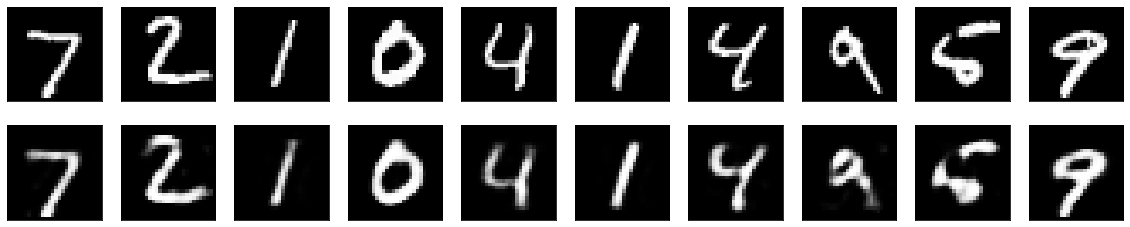

In [22]:
# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
import tensorflow
from tensorflow.keras import layers

input_img = tensorflow.keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [29]:
autoencoder = tensorflow.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 8s 24ms/step - loss: 0.2496 - val_loss: 0.1720
Epoch 2/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1540 - val_loss: 0.1390
Epoch 3/100
235/235 [==============================] - 6s 24ms/step - loss: 0.1338 - val_loss: 0.1260
Epoch 4/100
235/235 [==============================] - 5s 22ms/step - loss: 0.1242 - val_loss: 0.1210
Epoch 5/100
235/235 [==============================] - 6s 24ms/step - loss: 0.1186 - val_loss: 0.1151
Epoch 6/100
235/235 [==============================] - 6s 27ms/step - loss: 0.1140 - val_loss: 0.1105
Epoch 7/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1097 - val_loss: 0.1071
Epoch 8/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1067 - val_loss: 0.1041
Epoch 9/100
235/235 [==============================] - 8s 35ms/step - loss: 0.1046 - val_loss: 0.1024
Epoch 10/100
235/235 [==============================] - 4s 19ms/step - loss: 0.102

The Loss now came down a little i.e. to 0.08, previously, it was 0.09.
Hence the picture would also differ.

In [30]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


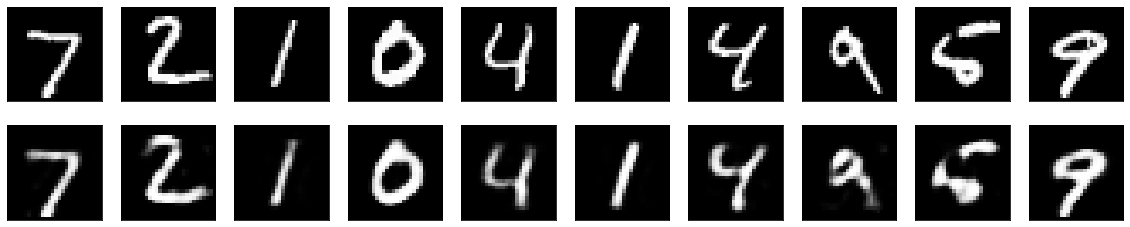

In [31]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()